In [1]:
import cv2 # computer vision library
import helpers_1_1

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [3]:
# Image data directories
image_dir_training = "1_1_Image_Representation/day_night_images/training/"
image_dir_test = "1_1_Image_Representation/day_night_images/test/"

In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers_1_1.load_dataset(image_dir_training)

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers_1_1.standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


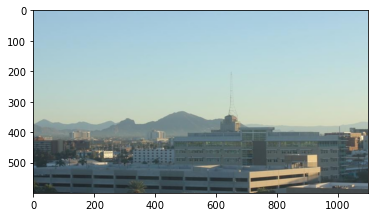

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

Label: 1


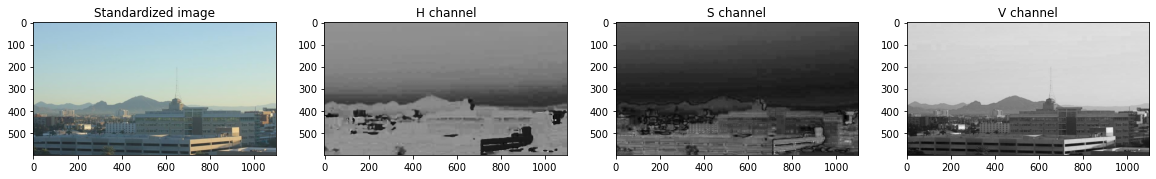

In [6]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


In [7]:
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    # Calculate area
    (x, y, z) = hsv.shape
    area = x*y
    
    # Find and return average
    avg = sum_brightness / area
    return avg

Avg brightness: 72.19684242424242


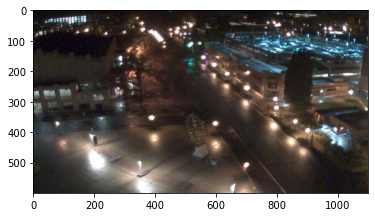

In [8]:
# Look at day and night images and their avg brightness

image_num = 169
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

In [8]:
def classifDayNight(image):
    avg = avg_brightness(image)
    if(avg > 110):
        return 1
    else:
        return 0

In [33]:
image_num = 8
test_im = STANDARDIZED_LIST[image_num][0]

print(classifDayNight(test_im))

1


### Vemos la eficiencia del clasificador

In [6]:
import random

#Using the load_dataset function in helpers.py
#Load test data
TEST_IMAGE_LIST = helpers_1_1.load_dataset(image_dir_test)

#Standardize the test data
STANDARDIZED_TEST_LIST = helpers_1_1.standardize(TEST_IMAGE_LIST)

#Suffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [9]:
def get_misclassified_images(test_images):
    misclassified = []
    
    for image in test_images:
        im = image[0]
        true_label = image[1]
        
        predicted_label = classifDayNight(im)
        
        if(predicted_label != true_label):
            misclassified.append((im,predicted_label,true_label))
    
    return misclassified

In [10]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct / total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) + ' out of ' + str(total))

Accuracy: 0.8875
Number of misclassified images = 18out of 160
